# YOLOv5 Segmentation

In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


In [3]:
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

/kaggle/working/yolov5


100%|██████████| 4.11M/4.11M [00:00<00:00, 54.8MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 125MB/s] 

100%|██████████| 42.4M/42.4M [00:00<00:00, 208MB/s] 

100%|██████████| 91.9M/91.9M [00:00<00:00, 246MB/s]

100%|██████████| 170M/170M [00:00<00:00, 239MB/s] 



### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

In [4]:
%cd {HOME}/yolov5 
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vgchO46Hs1W2IyKV7d2X")
project = rf.workspace("train-earve").project("yolov7-seg-test-fxt3v")
version = project.version(7)
dataset = version.download("yolov5")

/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.9 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
   


Extracting Dataset Version Zip to yolov7-seg-test-7 in yolov5pytorch:: 100%|██████████| 1624/1624 [00:00<00:00, 5945.83it/s]


In [5]:
%cat {dataset.location}/data.yaml

names:
- Detect
- Detect2
- RestricedZone
- RestrictedZone
nc: 4
roboflow:
  license: CC BY 4.0
  project: yolov7-seg-test-fxt3v
  url: https://universe.roboflow.com/train-earve/yolov7-seg-test-fxt3v/dataset/7
  version: 7
  workspace: train-earve
test: ../test/images
train: yolov7-seg-test-7/train/images
val: yolov7-seg-test-7/valid/images


# Train On Custom Data 

In [ ]:
!python /kaggle/working/yolov5/segment/train.py --img 640 --batch 16 --epochs 100 --data /kaggle/working/yolov5/yolov7-seg-test-7/data.yaml --weights yolov5s-seg.pt

2024-03-26 16:48:24.244072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 16:48:24.244132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 16:48:24.245692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/kaggle/working/yolov5/yolov7-seg-test-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, 

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

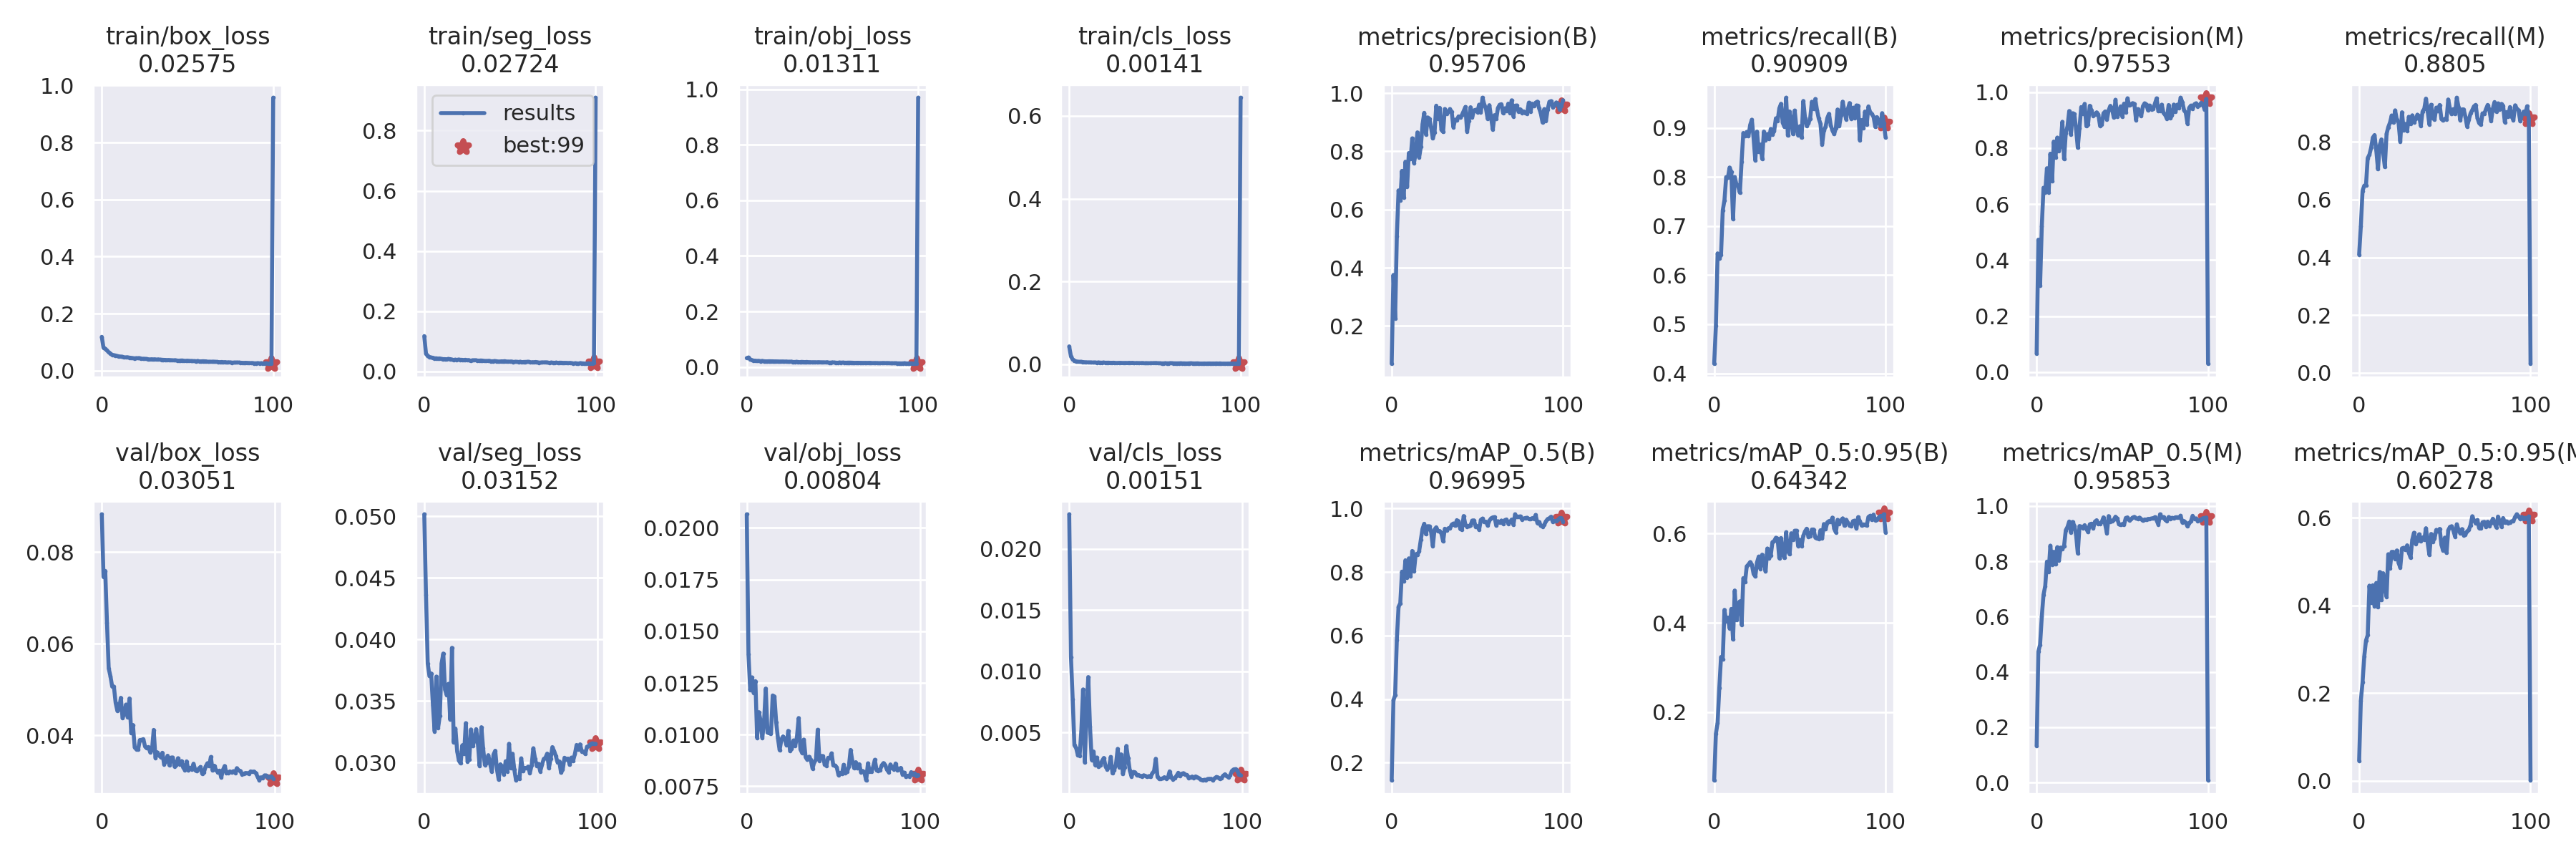

In [7]:
from IPython.display import Image
Image(filename='runs/train-seg/exp/results.png', width=1200)
!cat {HOME}/runs/train-seg/exp/results.csv | head -10

### Validate Your Custom Model


In [8]:
!python /kaggle/working/yolov5/segment/val.py --weights runs/train-seg/exp/weights/last.pt --data /kaggle/working/yolov5/yolov7-seg-test-7/data.yaml --img 640  --name custom-dataset

segment/val: data=/kaggle/working/yolov5/yolov7-seg-test-7/data.yaml, weights=['runs/train-seg/exp/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /kaggle/working/yolov5/yolov7-seg-test-7/valid/labels.cache... 69 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         69        152      0.957      0.909       0.97      0.643      0.923      0.912       0.95      0.573
                Detect         69         54      0.908      0.889       0.93      0.545      0.841      0.889   

### Infer With Your Custom Model

In [9]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /kaggle/working/yolov5/yolov7-seg-test-7/test/images/ps_283_jpg.rf.dd4e34140d56091825242d7ea6e979a2.jpg

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/kaggle/working/yolov5/yolov7-seg-test-7/test/images/ps_283_jpg.rf.dd4e34140d56091825242d7ea6e979a2.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /kaggle/working/yolov5/yolov7-seg-test-7/test/images/ps_283_jpg.rf.dd4e34140d56091825242d7ea6e979a2.jpg: 320x320 1 Detect2, 1 RestrictedZone, 6.6ms
Speed: 0.4ms pre-process, 6.6ms inference, 498.2ms NMS per image at sha

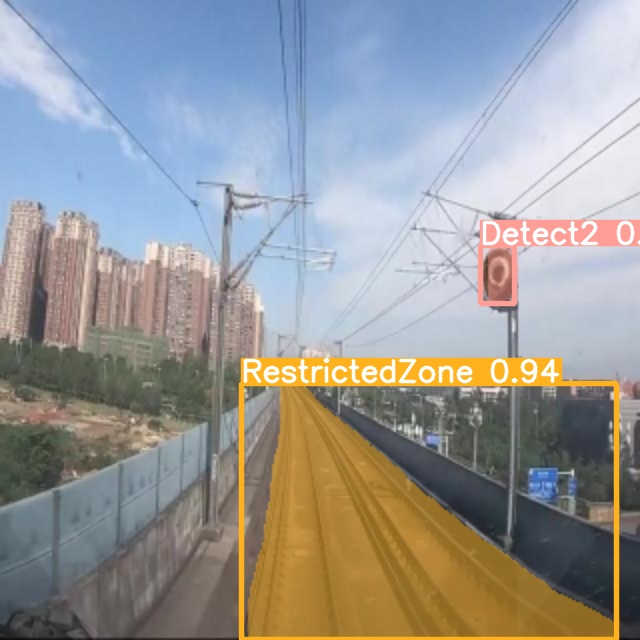

In [10]:
from IPython.display import Image
Image(filename='runs/predict-seg/exp/ps_283_jpg.rf.dd4e34140d56091825242d7ea6e979a2.jpg', width=1200)


Valid

In [11]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /kaggle/working/yolov5/yolov7-seg-test-7/valid/images/ps_34_jpg.rf.16d5611004635ee2a0a43e082a758910.jpg

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/kaggle/working/yolov5/yolov7-seg-test-7/valid/images/ps_34_jpg.rf.16d5611004635ee2a0a43e082a758910.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /kaggle/working/yolov5/yolov7-seg-test-7/valid/images/ps_34_jpg.rf.16d5611004635ee2a0a43e082a758910.jpg: 320x320 3 Detects, 1 RestrictedZone, 7.0ms
Speed: 0.4ms pre-process, 7.0ms inference, 536.2ms NMS per image at sha

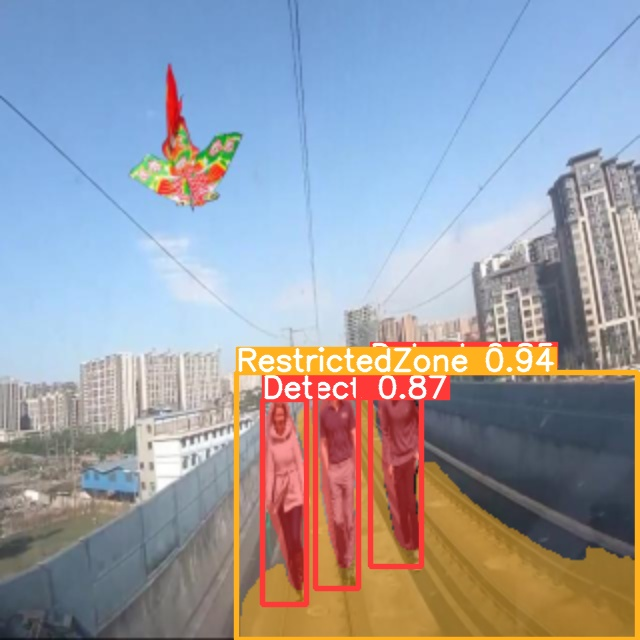

In [12]:
from IPython.display import Image
Image(filename='runs/predict-seg/exp2/ps_34_jpg.rf.16d5611004635ee2a0a43e082a758910.jpg', width=1200)


# Scenario 1: Validation of simple image


In [13]:
#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /kaggle/input/validation-images/Validation1.jpg

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/kaggle/input/validation-images/Validation1.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /kaggle/input/validation-images/Validation1.jpg: 320x320 1 RestrictedZone, 6.6ms
Speed: 0.3ms pre-process, 6.6ms inference, 504.7ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp3


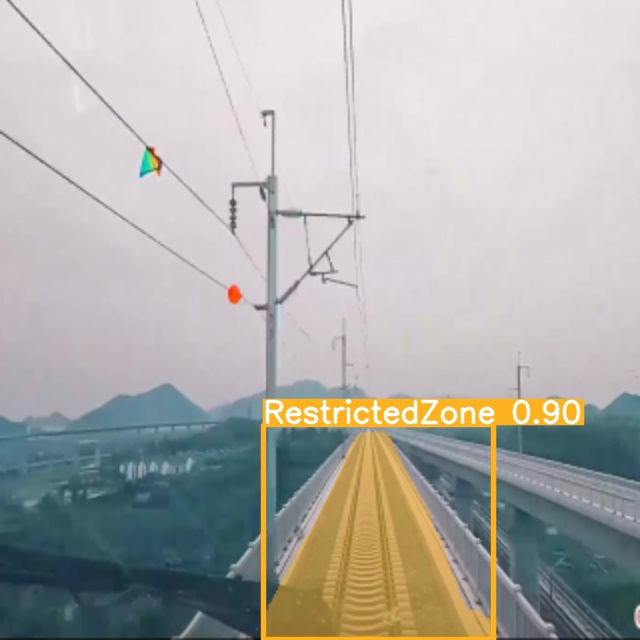

In [14]:
from IPython.display import Image
Image(filename='runs/predict-seg/exp3/Validation1.jpg', width=1200)

# Message using Twilio platform 

In [ ]:
from twilio.rest import Client

# Your Twilio account credentials
account_sid = 'AC170d977fa9c506f22a692db46b5ed767'
auth_token = '8ea428407e2635886220eab87eb0594c'
twilio_phone_number = '+18599550945'  # Should be your Twilio phone number

# Recipient phone number
recipient_phone_number = '+3530892623856'

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Function to send an SMS
def send_sms(message):
    try:
        # Send SMS message
        message = client.messages.create(
            body=message,
            from_=twilio_phone_number,
            to=recipient_phone_number
        )
        print("Message sent successfully. SID:", message.sid)
    except Exception as e:
        print("Error sending message:", e)

result = False
if 'detect' == True and 'RestrictedZone' == True:
    result = True
if 'detect2' == True:
    result = True

if result:
    warning_message = "Warning: Detects being detected on railway track. Kindly take action

send_sms(warning_message)


# Scenario 2: Validation of person detection image

In [26]:
#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /kaggle/input/validation-images/Validation2.jpg

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/kaggle/input/validation-images/Validation2.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /kaggle/input/validation-images/Validation2.jpg: 320x320 1 Detect, 1 RestrictedZone, 7.5ms
Speed: 0.4ms pre-process, 7.5ms inference, 573.7ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp6


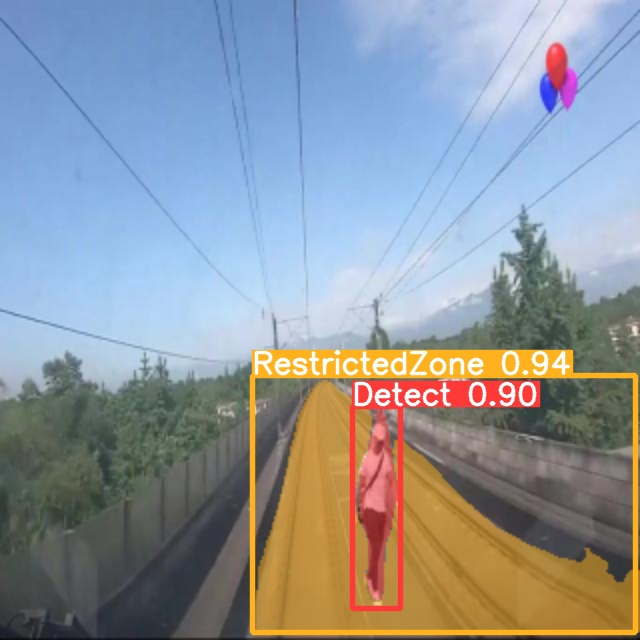

In [27]:
from IPython.display import Image
Image(filename='runs/predict-seg/exp6/Validation2.jpg', width=1200)

# Message using Twilio platform 

In [1]:
from twilio.rest import Client

# Your Twilio account credentials
account_sid = 'AC170d977fa9c506f22a692db46b5ed767'
auth_token = '8ea428407e2635886220eab87eb0594c'
twilio_phone_number = '+18599550945'  # Should be your Twilio phone number

# Recipient phone number
recipient_phone_number = '+3530892623856'

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Function to send an SMS
def send_sms(message):
    try:
        # Send SMS message
        message = client.messages.create(
            body=message,
            from_=twilio_phone_number,
            to=recipient_phone_number
        )
        print("Message sent successfully. SID:", message.sid)
    except Exception as e:
        print("Error sending message:", e)

result = False
if 'detect' == True and 'RestrictedZone' == True:
    result = True
if 'detect2' == True:
    result = True

if result:
    warning_message = "Warning: Detects being detected on railway track. Kindly take action

send_sms(warning_message)


Message sent successfully. SID: AC170d977fa9c506f22a692db46b5ed767


# Scenario 3: Validation of image detecting both person and object

In [24]:
#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source /kaggle/input/validation-image/Validation4.jpg

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/kaggle/input/validation-image/Validation4.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7406513 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /kaggle/input/validation-image/Validation4.jpg: 320x320 2 Detects, 1 Detect2, 1 RestrictedZone, 6.6ms
Speed: 0.3ms pre-process, 6.6ms inference, 459.0ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp5


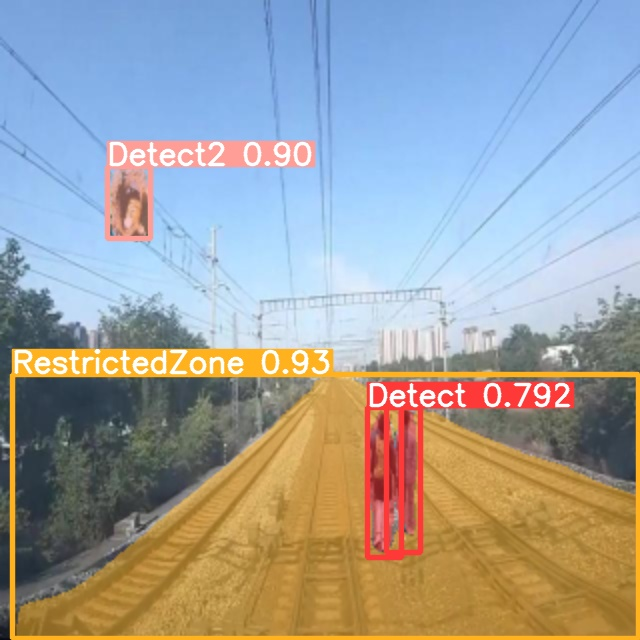

In [25]:
from IPython.display import Image
Image(filename='runs/predict-seg/exp5/Validation4.jpg', width=1200)

# Message using Twilio platform 

In [22]:
from twilio.rest import Client

# Your Twilio account credentials
account_sid = 'AC170d977fa9c506f22a692db46b5ed767'
auth_token = '8ea428407e2635886220eab87eb0594c'
twilio_phone_number = '+18599550945'  # Should be your Twilio phone number

# Recipient phone number
recipient_phone_number = '+3530892623856'

# Initialize Twilio client
client = Client(account_sid, auth_token)

# Function to send an SMS
def send_sms(message):
    try:
        # Send SMS message
        message = client.messages.create(
            body=message,
            from_=twilio_phone_number,
            to=recipient_phone_number
        )
        print("Message sent successfully. SID:", message.sid)
    except Exception as e:
        print("Error sending message:", e)

result = False
if 'detect' == True and 'RestrictedZone' == True:
    result = True
if 'detect2' == True:
    result = True

if result:
    warning_message = "Warning: Detects being detected on railway track. Kindly take action

send_sms(warning_message)


Message sent successfully. SID: AC170d977fa9c506f22a692db46b5ed767
